## Examples of crystallisation calculations (T-P path)

In [10]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
import pyMELTScalc as M

sys.path.append(r'G:\My Drive\2022\GitHub\pyMELTScalc\MELTS')

import time
import random

In this notebook, we discuss the various ways to perform crystallistaion and degassing calculations using the pyMELTScalc package. All the calculations are performed here using the same funtion $\textit{multi_path}$, with the optional variables changed to demonstrate how differnt inputs can be used to generate very different MELTS calculations.

For the examples shown here, we have taken data from Sao Miguel in the Azores (compiled from GEOROC).

In [11]:
#Data = pd.read_excel('AzoresDataset\SaoMiguel.xlsx')
Data = pd.read_csv('/Users/ollie/Rhiannon_MELTS/gleeson_azorestest.csv')
Data = Data[Data.H2O.isin([1])]

In [12]:
Data.columns = [str(col) + '_Liq' for col in Data.columns]
Data

,SiO2_Liq,TiO2_Liq,Al2O3_Liq,Cr2O3_Liq,FeOt_Liq,CaO_Liq,MgO_Liq,MnO_Liq,K2O_Liq,Na2O_Liq,P2O5_Liq,H2O_Liq
0,45.412,3.384,12.25,0,11.4826,10.98,10.656,0.184,1.306,2.284,0.436,1


For the purposes of demonstrating how the code deals with a multiple initial bulk compositions, we randomly selected 5 mafic compositions from the GEOROC database. These are used as the initial compositions in the following models.

In [13]:
Loc = np.sort(np.random.choice(30,5, replace = False)+10)
Comp = Data.loc[Loc].copy()
Comp = Comp.reset_index(drop = True)

KeyError: "None of [Int64Index([12, 15, 32, 38, 39], dtype='int64')] are in the [index]"

In [14]:
Comp = Data.copy()
Comp

,SiO2_Liq,TiO2_Liq,Al2O3_Liq,Cr2O3_Liq,FeOt_Liq,CaO_Liq,MgO_Liq,MnO_Liq,K2O_Liq,Na2O_Liq,P2O5_Liq,H2O_Liq
0,45.412,3.384,12.25,0,11.4826,10.98,10.656,0.184,1.306,2.284,0.436,1


For other models, we demonstrate how variations in melt water content, oxygen fugacity, or pressure influence the fractional crystallisation path from a single parent magma composition. To do so, we isolate the first of the 5 compositions determined above into a dictionary. 

This provides two options for the input bulk data: (i) a dictionary containing a single bulk compositions - the number of calculations performed will then be determined by the other variables specified; (ii) a pandas DataFrame of compositions, with the number of calculations specified by the size of the DataFrame.

In [15]:
comp = Comp[Comp.columns[Comp.columns.str.contains('_Liq')]].mean().to_dict()
comp

{'SiO2_Liq': 45.412,
 'TiO2_Liq': 3.384,
 'Al2O3_Liq': 12.25,
 'Cr2O3_Liq': 0.0,
 'FeOt_Liq': 11.4826,
 'CaO_Liq': 10.98,
 'MgO_Liq': 10.656,
 'MnO_Liq': 0.184,
 'K2O_Liq': 1.306,
 'Na2O_Liq': 2.284,
 'P2O5_Liq': 0.436,
 'H2O_Liq': 1.0}

## Isobaric Fractional Crystallisation of a single bulk composition

The simplest, and perhaps most common, calculation that can be performed with $\textit{multi_path}$ is fractional crystallisation of a single parent magma composition at a fixed pressure with user specified initial $Fe^{3+}/Fe_{tot}$ ratio and melt H$_{2}$O content.

In the function below, the user must specify the model to use (here MELTSv1.2.0), the bulk composition (comp), whether to fractionate solid and fluid components following crystallisation, the pressure, final temperature (used to determine when the calculation finishes), the temperature drop at each step, the initial $Fe^{3+}/Fe_{tot}$ ratio of the melt, and the initial melt H$_{2}$O content. In addition, the user must either specify an initial temperature for the model calculation, or state $\textit{find_liquidus = True}$ (as shown here), which will cause the model to find the wet liquidus prior to fractional crystallisation.

In [16]:
P = 2000
Results = M.multi_path(Model = "MELTSv1.2.0", comp = comp, Frac_solid = True, Frac_fluid = True, T_end_C = 800, dt_C = 5,
                      P_bar = P, Fe3Fet_Liq = 0.15, H2O_Liq = 1, find_liquidus = True)

Running MELTSv1.2.0 calculation... Complete (time taken = 7.35 seconds)

The same calculation can also be called using $Isobaric_{-}crystallisation$, which offers less flexibilty in the input structure.

In [17]:
Results = M.Isobaric_crystallisation(Model = "MELTSv1.2.0", comp = comp, Frac_solid = True, Frac_fluid = True, 
                                     T_end_C = 800, dt_C = 5, P_bar = P, 
                                     Fe3Fet_Liq = 0.15, H2O_Liq = 1, find_liquidus = True)

Running MELTSv1.2.0 calculation... Complete (time taken = 5.56 seconds)

The results of the calculations performed in this notebook will be shown using standard Harker diagrams, constructed using an in-built pyMELTScalc function.

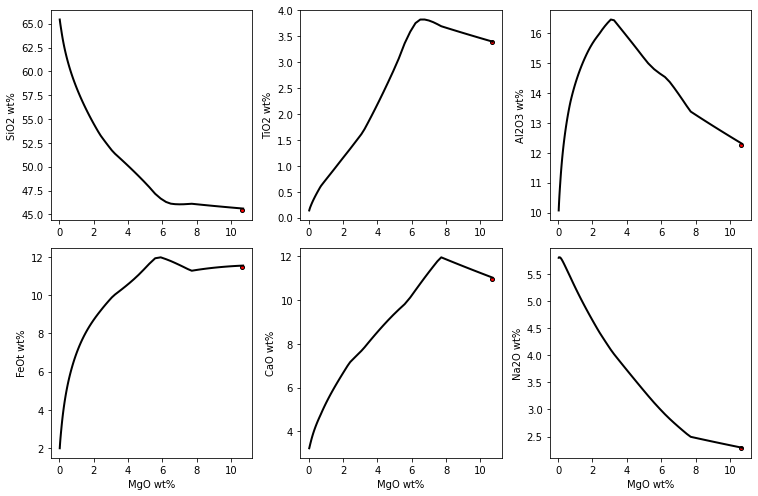

In [18]:
M.harker(Results = Results, x_axis = "MgO", y_axis = ["SiO2", "TiO2", "Al2O3", "FeOt", "CaO", "Na2O"], phase = "liquid1", data = Data)

Instead of running the calculation with the melt oxygen fugacity determined by an initial $Fe^{3+}/Fe_{tot}$ ratio that is then allowed to evolve unbuffered, the user may wish to specify an offset to a known oxygen fugacity buffer (e.g., FMQ or NNO) and force the melt to evolve along that buffer. This is done by first specifying the buffer $\textit{fO2_buffer = "FMQ"}$ and then specifing the offset to that buffer $\textit{fO2_offset = 0.5}$.

In [19]:
Results = M.multi_path(Model = "MELTSv1.2.0", comp = comp, Frac_solid = True, Frac_fluid = True, T_end_C = 800, dt_C = 5,
                      P_bar = P, fO2_buffer = "FMQ", fO2_offset = 1, H2O_Liq = 1, find_liquidus = True)

Running MELTSv1.2.0 calculation... Complete (time taken = 5.1 seconds)

In [21]:
P_lin = ([2000.0,1000.0,500.0])
P_results_unbuff = {}
for i in range(len(P_lin)):
    P_bar = P_lin[i]
    print(P_bar)
    Results = M.multi_path(cores=4,Model = "MELTSv1.2.0", comp = comp, Frac_solid = True, Frac_fluid = True, T_end_C = 700, dt_C = 5,
                      P_bar = P_bar, fO2_buffer = "FMQ", fO2_offset = 1, H2O_Liq = None, find_liquidus = True)

    P_results_unbuff['P = ' + str(P_lin[i]) + ' bars'] = Results

2000.0
Running MELTSv1.2.0 calculation... Complete (time taken = 7.44 seconds)1000.0
Running MELTSv1.2.0 calculation... Complete (time taken = 5.93 seconds)500.0
Running MELTSv1.2.0 calculation... Complete (time taken = 5.98 seconds)

In [22]:
P_results_unbuff

{'P = 2000.0 bars': {'Conditions':              T_C   P_bar             h           s          v
  0    1239.500000  2000.0 -1.174629e+06  280.237557  37.131516
  1    1234.504630  2000.0 -1.175601e+06  279.589157  37.104021
  2    1229.509259  2000.0 -1.170475e+06  277.753314  36.926904
  3    1224.513889  2000.0 -1.165379e+06  275.930276  36.751040
  4    1219.518519  2000.0 -1.160384e+06  274.133702  36.578162
  ..           ...     ...           ...         ...        ...
  104   719.981481  2000.0 -1.683938e+05   33.868444   5.865337
  105   714.986111  2000.0 -1.649842e+05   33.161091   5.767406
  106   709.990741  2000.0 -1.602855e+05   32.164486   5.601643
  107   704.995370  2000.0 -1.560526e+05   31.261248   5.452067
  108   700.000000  2000.0 -1.522178e+05   30.437776   5.316302
  
  [109 rows x 5 columns],
  'liquid1':       SiO2_Liq  TiO2_Liq  Al2O3_Liq  Cr2O3_Liq  Fe2O3_Liq   FeO_Liq  \
  0    45.569437  3.395732  12.292469        0.0   2.813990  8.989301   
  1    45.594

As shown below, the choice of whether to buffer the oxygen fugacity of the melt (or not) has an influence of the differentiation path. Specifically, the $FeO_t$ and $CaO$ content of the eolved melt phase appear to be significantly influenced by this choice.

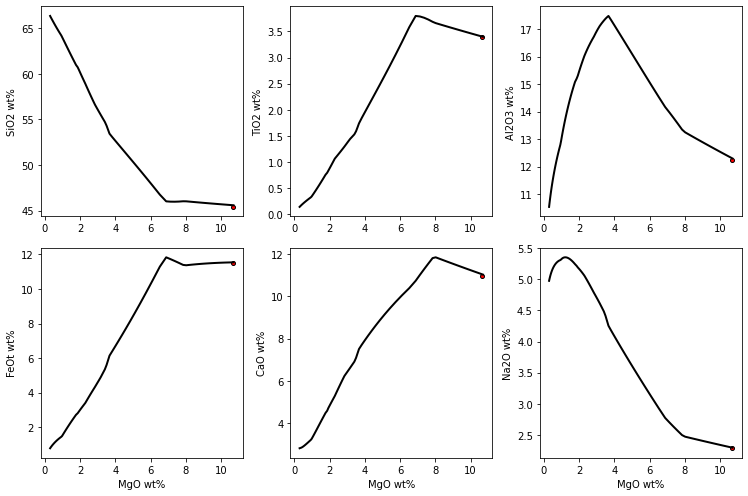

In [26]:
M.harker(Results = Results, x_axis = "MgO", y_axis = ["SiO2", "TiO2", "Al2O3", "FeOt", "CaO", "Na2O"], phase = "liquid1", data = Data)

## Isobaric fractional crystallisation from multiple initial compsitions

pyMELTScalc allows crystallisation calculations to be performed from multiple initial compositions. This is done in the same was as the single calculations performed above, but in this case the $comp$ variable represents a pandas DataFrame rather than a dictionary.

In [27]:
Comp

,SiO2_Liq,TiO2_Liq,Al2O3_Liq,Cr2O3_Liq,FeOt_Liq,CaO_Liq,MgO_Liq,MnO_Liq,K2O_Liq,Na2O_Liq,P2O5_Liq,H2O_Liq
0,45.412,3.384,12.25,0,11.4826,10.98,10.656,0.184,1.306,2.284,0.436,1


In [28]:
Results = M.multi_path(Model = "MELTSv1.2.0", comp = Comp, Frac_solid = True, Frac_fluid = True, 
                       T_end_C = 800, dt_C = 5, P_bar = P, Fe3Fet_Liq = 0.15, H2O_Liq = 1, find_liquidus = True)

Running MELTSv1.2.0 calculations 0 to 0.0 ... Complete (time taken = 5.3 seconds)



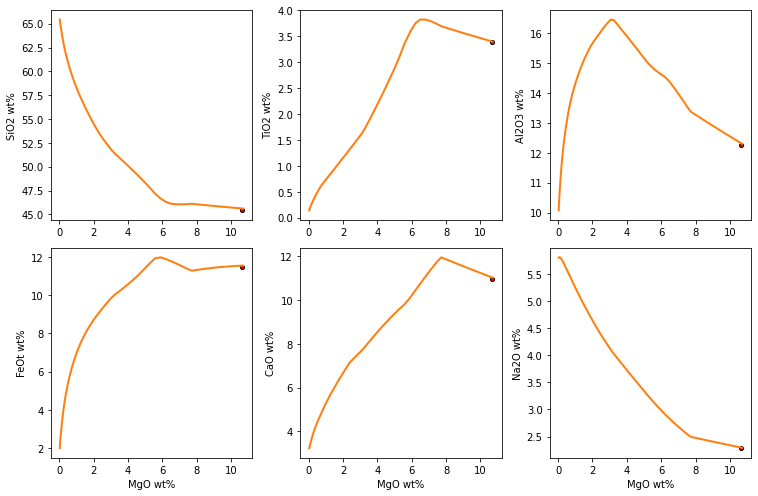

In [29]:
M.harker(Results = Results, x_axis = "MgO", y_axis = ["SiO2", "TiO2", "Al2O3", "FeOt", "CaO", "Na2O"], phase = "liquid1", data = Data)

## Isobaric fractional crystallisation of a single bulk composition under variable $P$, melt $H_{2}O$, and $\textit{f}O_{2}$

Rather than specifying variations in the initial bulk composition of the model calculations, the user can specify variations in a number of different parameters. First, we demonstrate a calculation to perform 10 different fractional crystallisation models at 10 different pressures, using the same initial bulk composition. The only difference from the first calculation performed above is that pressure is now a numpy array, rather than a float variable.

In [30]:
P = np.linspace(1000,10000,10)
Results = M.multi_path(Model = "MELTSv1.2.0", comp = comp, Frac_solid = True, Frac_fluid = True, 
                       T_end_C = 800, dt_C = 5, P_bar = P, Fe3Fet_Liq = 0.15, H2O_Liq = 1, find_liquidus = True)

Running MELTSv1.2.0 calculations 0 to 7.0 ... Complete (time taken = 189.77 seconds)
Running MELTSv1.2.0 calculations 8 to 9.0 ... Complete (time taken = 6.19 seconds)



In [ ]:
M.harker(Results = Results, x_axis = "MgO", y_axis = ["SiO2", "TiO2", "Al2O3", "FeOt", "CaO", "Na2O"], phase = "liquid1", data = Data)

Of course, rather than specifying variations in pressure, changes in initial $H_{2}O$ content may be provided. Here, $P_{-}bar$ is once again set as a single value, but $H2O_{-}Liq$ is now defined by a numpy array.

In [34]:
bulk = Comp.iloc[0].values.tolist()

h2o = [0.5, 1.        , 2.33333333, 3.66666667, 5.        ]
#co2 = [0.01] #,0.01,0.1,0.2
emptydf = pd.DataFrame()
for i in range(len(h2o)):
    bulk[11] = h2o[i]
    #for j in range(len(co2)):
     #   bulk[3] = co2[j]
    emptydf = emptydf.append(pd.DataFrame([bulk]), ignore_index=True)

emptydf.columns = Comp.columns
#emptydf = emptydf[['SiO2', 'TiO2', 'Al2O3','FeOt', 'MgO', 'CaO', 'Na2O', 'K2O','MnO', 'P2O5', 'H2O']]#, 'CO2'
emptydf

,SiO2_Liq,TiO2_Liq,Al2O3_Liq,Cr2O3_Liq,FeOt_Liq,CaO_Liq,MgO_Liq,MnO_Liq,K2O_Liq,Na2O_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,CO2_Liq
0,45.412,3.384,12.25,0.0,11.4826,10.98,10.656,0.184,1.306,2.284,0.436,0.500000,0.15,0.0
1,45.412,3.384,12.25,0.0,11.4826,10.98,10.656,0.184,1.306,2.284,0.436,1.000000,0.15,0.0
2,45.412,3.384,12.25,0.0,11.4826,10.98,10.656,0.184,1.306,2.284,0.436,2.333333,0.15,0.0
3,45.412,3.384,12.25,0.0,11.4826,10.98,10.656,0.184,1.306,2.284,0.436,3.666667,0.15,0.0
4,45.412,3.384,12.25,0.0,11.4826,10.98,10.656,0.184,1.306,2.284,0.436,5.000000,0.15,0.0


In [35]:
P = 2000
H2O_Liq = [0.5, 1.0, 2.33333333, 3.66666667, 5.0]
Results = M.multi_path(Model = "MELTSv1.2.0", comp = emptydf, Frac_solid = True, Frac_fluid = True, 
                       T_end_C = 800, dt_C = 5, P_bar = P, Fe3Fet_Liq = 0.15, H2O_Liq = H2O_Liq, find_liquidus = True)

Running MELTSv1.2.0 calculations 0 to 4.0 ... Complete (time taken = 7.76 seconds)



In [36]:
Results

{'index = 0': {'Conditions':             T_C   P_bar             h           s          v
  0   1265.200000  2000.0 -1.169909e+06  278.188075  36.613726
  1   1260.197849  2000.0 -1.170902e+06  277.541829  36.587287
  2   1255.195699  2000.0 -1.165528e+06  275.627850  36.402889
  3   1250.193548  2000.0 -1.160172e+06  273.724832  36.219476
  4   1245.191398  2000.0 -1.154923e+06  271.850404  36.039257
  ..          ...     ...           ...         ...        ...
  82   855.023656  2000.0 -1.841523e+05   36.984817   6.189948
  83   850.021505  2000.0 -1.784062e+05   35.848327   6.004964
  84   845.019355  2000.0 -1.729165e+05   34.764219   5.828337
  85   840.017204  2000.0 -1.677149e+05   33.742276   5.661547
  86   835.015054  2000.0           NaN         NaN        NaN
  
  [87 rows x 5 columns],
  'liquid1':      SiO2_Liq  TiO2_Liq  Al2O3_Liq  Cr2O3_Liq  Fe2O3_Liq   FeO_Liq   FeOt_Liq  \
  0   45.840509  3.415932  12.365591        0.0   1.931059  9.852308  11.600811   
  1   45.869

In [ ]:
H2O_Liq = np.linspace(1,5,4)
H2O_Liq

In [37]:
empty = pd.DataFrame() 

for key in Results:
    new = Results[key]['All']

    new['dict_index'] = key
    #new[['pressure_bar', 'T_C']] = final_dict[key]['Conditions'][['P_bar','T_C']]
    empty = empty.append(new)
empty.dict_index.unique()

array(['index = 0', 'index = 2', 'index = 1', 'index = 3', 'index = 4'],
      dtype=object)

In [38]:
MELTS_iter['index'] = MELTS_iter.index #caveats w this format, change 
newkeys = MELTS_iter[['index','dictindex']]
newkeys

NameError: name 'MELTS_iter' is not defined

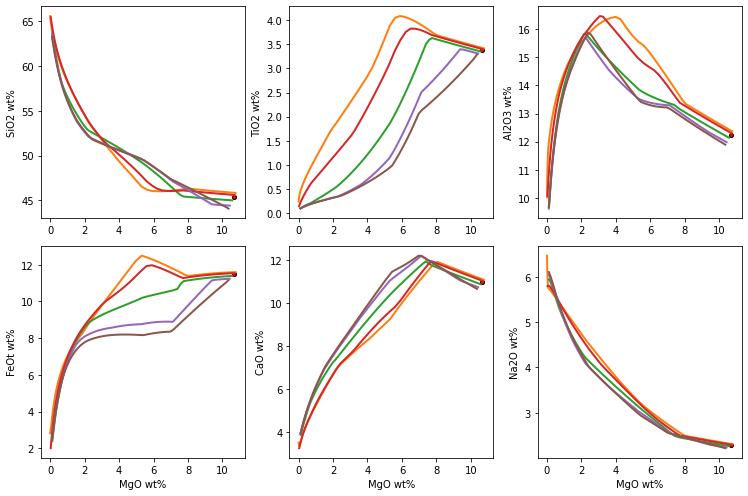

In [39]:
M.harker(Results = Results, x_axis = "MgO", y_axis = ["SiO2", "TiO2", "Al2O3", "FeOt", "CaO", "Na2O"], phase = "liquid1", data = Data)


Similarly, $P$ and melt $H_{2}O$ content may be fixed, with variations in the initial $Fe^{3+}/Fe_{tot}$ ratio, or offset to an oxygen fugacity buffer specified. First, we demonstrate the results of using variable Fe redox states:

In [ ]:
Fe3Fet_Liq = np.linspace(0.05, 0.4, 6)
Results = M.multi_path(Model = "MELTSv1.2.0", comp = comp, Frac_solid = True, Frac_fluid = True, 
                       T_end_C = 800, dt_C = 5, P_bar = P, Fe3Fet_Liq = Fe3Fet_Liq, H2O_Liq = 1, find_liquidus = True)

In [ ]:
M.harker(Results = Results, x_axis = "MgO", y_axis = ["SiO2", "TiO2", "Al2O3", "FeOt", "CaO", "Na2O"], phase = "liquid1", data = Data)

Next, we specify variations in the offset from a known $\textit{f}O_{2}$ buffer:

In [9]:
fO2_offset = np.linspace(-2, 2, 5)
Results = M.multi_path(Model = "MELTSv1.2.0", comp = comp, Frac_solid = True, Frac_fluid = True, 
                       T_end_C = 800, dt_C = 5, P_bar = 2000, fO2_buffer = "FMQ", fO2_offset = 1, 
                       H2O_Liq = 1, find_liquidus = True)

Running MELTSv1.2.0 calculation... Complete (time taken = 5.58 seconds)

In [ ]:
M.harker(Results = Results, x_axis = "MgO", y_axis = ["SiO2", "TiO2", "Al2O3", "FeOt", "CaO", "Na2O"], phase = "liquid1", data = Data)

Of course, it is possible to change each of these variables simultaneously. For example, you could specify 10 pressures, and 10 initial compositions and pyMELTScalc will perform 10 calculations with each pressure assigned to a different initial composition. If, instead, you want to perform calculations based on the entire range of possible different combinations of parameters (e.g., 16 calculations based on 4 different pressures and 4 different initial melt $H_{2}O$ contents) the function $\textit{combine_params}$ must first be used:

**Example with combined parameters to be entered here when developed**

## Polybaric Crystallisation 

In addition to the isobaric crystallisation calculations performed above it is also possible to perform polybaric crystallistaion with pyMELTScalc. In this case, it is necessary to define either a temperature and pressure path, or a temperature and pressure step (i.e., change in temperature and pressure with each iteration).

To start, we will model 2-stage polybaric crystallisation (e.g., a step change in magma storage pressure). As a general rule, we suggest that $\textit{find_liquidus}$ is not used here as it will modify the inputed $P-T$ path. One option is to run the $\textit{find_liq}$ function of pyMELTScalc independently to first determine the liquidus of the melt phase.

In [ ]:
T_liq, H2O_Liq = M.findLiq_multi(Model = "MELTSv1.2.0", comp = comp, 
                               P_bar = 6000, H2O_Liq = 1, fO2_buffer = "FMQ", fO2_offset = 0.5)

T_path_C = np.linspace(T_liq,800,201)
P1 = np.zeros(100) + 6000
P2 = np.zeros(101) + 2000
P_path_bar = np.concatenate([P1,P2])

Results = M.multi_path(Model = "MELTSv1.2.0", comp = comp, Frac_solid = True, Frac_fluid = True, 
                       T_path_C = T_path_C, P_path_bar = P_path_bar, fO2_buffer = "FMQ", fO2_offset = 0.5, 
                       H2O_Liq = 1)

In [ ]:
M.harker(Results = Results, x_axis = "MgO", y_axis = ["SiO2", "TiO2", "Al2O3", "FeOt", "CaO", "Na2O"], 
         phase = "liquid1", data = Data)

We can now compare how this step change in pressure differs from a model where pressure changes continuously with temperature:

In [ ]:
T_path_C = np.linspace(T_liq,800,201)
P1 = np.zeros(100) + 6000
P2 = np.zeros(101) + 2000
P3 = np.linspace(6000,2000,201)
P_path_bar = np.zeros((2,len(T_path_C))) #concatenate([P1,P2])
P_path_bar[0,:] = np.concatenate([P1,P2])
P_path_bar[1,:] = P3

Results = M.multi_path(Model = "MELTSv1.2.0", comp = comp, Frac_solid = True, Frac_fluid = True, 
                       T_path_C = T_path_C, P_path_bar = P_path_bar, fO2_buffer = "FMQ", fO2_offset = 0.5, 
                       H2O_Liq = 1)

In [ ]:
M.harker(Results = Results, x_axis = "MgO", y_axis = ["SiO2", "TiO2", "Al2O3", "FeOt", "CaO", "Na2O"], 
         phase = "liquid1", data = Data)

The final method of producing polybaric fractional crystallisation is to define a $dp$ value (i.e., the change in pressure at each step), along with $dt$ and $T_end$.

In [ ]:
Results = M.multi_path(Model = "MELTSv1.2.0", comp = comp, Frac_solid = True, Frac_fluid = True, 
                       T_end_C = 800, dt_C = 2, P_start_bar = 6000, dp_bar = 20, 
                       fO2_buffer = "FMQ", fO2_offset = 0.5, 
                       H2O_Liq = 1, find_liquidus = True)

In [ ]:
M.harker(Results = Results, x_axis = "MgO", y_axis = ["SiO2", "TiO2", "Al2O3", "FeOt", "CaO", "Na2O"], 
         phase = "liquid1", data = Data)